From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
plt.style.use(['seaborn-whitegrid'])

In [12]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import shuffle

In [14]:
seed = 2022
np.random.seed(seed)

## K 최근접 이웃 분류 (Classification)

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [21]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [22]:
X, y = load_iris(return_X_y=True)
# X, y = shuffle(X, y, random_state=seed )
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=seed)

In [23]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_train) # scaler fit만 사용.

In [26]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


In [28]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.30833333333333335
평가 데이터 점수: 0.43333333333333335


왜 scale이나 shuffle 했을 경우에 <span style='color:red'> 더 나쁜 결과</span>가 나오는지 확인 필요함.

In [29]:
cross_validate(estimator=KNeighborsClassifier(),
               X=X, y=y,
               cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=1
              )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    8.8s finished


{'fit_time': array([0.00299811, 0.0019989 , 0.00200057, 0.00199962, 0.00299978]),
 'score_time': array([0.00899553, 0.00899601, 0.00499606, 0.0039959 , 0.00699496]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [30]:
param_grid = [{'n_neighbors': [3,5,7],
              'weights':['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [31]:
gs = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=1
                 )

In [32]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=1)

In [33]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [34]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}

In [36]:
print("GridSearchCV best score: {}".format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [38]:
def make_meshgrid(x, y, h=0.2): # h: 경계선 세밀도 정도
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [40]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [42]:
iris_comp_df = pd.DataFrame(X_comp)
iris_comp_df['Target'] = y
iris_comp_df.head()

,0,1,Target
0,12.257395,-19.318449,0
1,12.942140,-16.617193,0
2,11.827062,-16.890350,0
3,12.160565,-16.396772,0
4,12.368599,-19.300303,0


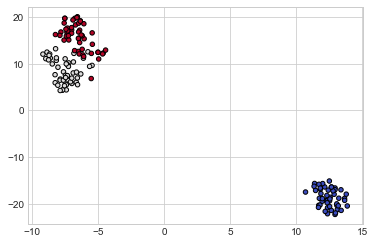

In [45]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [46]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

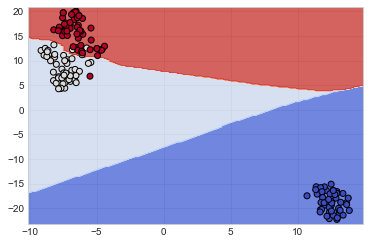

In [48]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

### 유방암 데이터

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

### 캘리포니아 주택 가격 데이터